# Regresión Logística

In [1]:
# Se importan las librerías necesarias
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.style.use("ggplot")

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


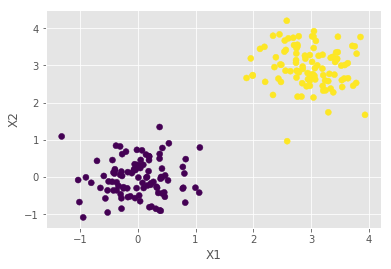

In [2]:
# Generar los datos a clasificar
X,Y=make_blobs(n_samples=200,centers=[[0,0],[3,3]],cluster_std=0.5,n_features=2)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [3]:
# Función logística
def fun_log(X):
    return 1/(1+np.exp(-X))

# Función de regresión logística
def reg_log(W,X,Y):
    hw=np.matrix(X)*np.matrix(W).transpose()
    return np.array(fun_log(hw))[:,0]

# Función de costo
def fun_cost(W,X,Y):
    yhat=reg_log(W,X,Y)
    J=np.sum(-Y*np.log(yhat)-(1-Y)*np.log(1-yhat))*(1/len(Y))
    return J

In [4]:
# Inicializar las variables para la optimización
Xa=np.append(np.ones((len(Y),1)),X,axis=1)
m,n=np.shape(Xa)
W=np.zeros(n)

In [5]:
# Optimización por medio de la librería
res=opt.minimize(fun_cost,W,args=(Xa,Y))
W=res.x

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USUARIO\Anaconda3\lib\site-packages

In [6]:
# Simular la regresión logística obtenida
Yhat=np.round(reg_log(W,Xa,Y),0)

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
Yhat

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.])

In [8]:
# Generar todas las posibles combinaciones entre x1 y x2
x=np.arange(-3,5,0.01)
y=np.arange(-3,5,0.01)
Xm,Ym=np.meshgrid(x,y)
m,n=np.shape(Xm)
Xmr=np.reshape(Xm,(m*n,1))
Ymr=np.reshape(Ym,(m*n,1))

Xtmp=np.append(Xmr,Ymr,axis=1)
Xtmp=np.append(np.ones((len(Xmr),1)),Xtmp,axis=1)
Ytmp=np.round(reg_log(W,Xtmp,Xmr),0)

Z=np.reshape(Ytmp, (m,n))

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


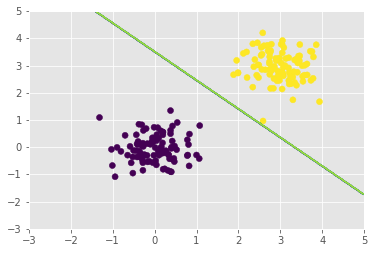

In [9]:
# Dibujar el contorno
plt.contour(Xm,Ym,Z)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()